In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

Check with Simulation: http://www.public.asu.edu/~hnesse/classes/seir.html?Beta=2.4&Gamma=1&Sigma=0.4&Mu=0&Nu=0&initialS=990&initialE=0&initialI=10&initialR=0&iters=20

In [102]:
def SEIR(exp,N):
    
    # Input parameters ####################
    #N = 1000                    # int; Total population.
    
    I0, E0, R0 = 0, exp, 0       # float; float; float; Initial number of infected, exposed, and recovered individuals
    
    S0 = N - I0 - R0 - E0        # float; Everyone else, S0, is susceptible to infection initially.
    
    beta,sigma,gamma = 2.4,0.4,1 # Contact rate beta, ? sigma, and mean recovery rate, gamma, (in 1/days).
    
    t = np.linspace(0, T_max, 10*T_max)# A grid of time points (in days)
    
    #########################################
    
    

    # The SIR differential equations ########
    
    def deriv(y, t, N, beta, sigma, gamma):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = +beta * S * I / N - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt
    
    #########################################
    
    
    y0 = S0, E0, I0, R0                               # Initial conditions vector
    
    ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma)) # Integrate the SIR equations over the time grid, t.
    
    S, E, I, R = ret.T                                   # Return the transpose of the matrix

#     plt.plot(t,S)
#     plt.plot(t,I)
#     plt.plot(t,R)
    return t,S/N,E/N,I/N,R/N

In [103]:
T_max = 20
t,s,e,i,r = SEIR(100,1000)

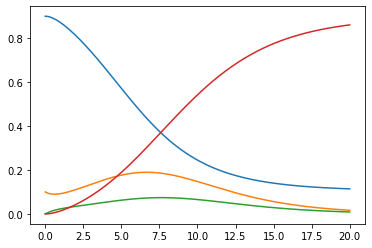

In [104]:
plt.plot(t,s)
plt.plot(t,e)
plt.plot(t,i)
plt.plot(t,r)
plt.show()

In [112]:
import random

def GA(exp,N):
    # Input parameters ####################

    #N = 1000         # int; total population
    n_E = exp        # int; initial infected population
    n_I = 0
    n_R = 0        # int; recovered population

    T = T_max      # float; maximum elapsed time
    _t = 0.0       # float; start time


    V = N          # float; spatial parameter

    _gamma = 1     # float; rate of recovery

    _R0 = 2.4      # float; reproductive number

    _beta = _R0*_gamma    # float; rate of infection after contact
    
    _sigma = 0.4

    #########################################


    n_S = N - n_I - n_E  # Computing susceptible population


    # Initialize results list ###############

    S = []
    E = []
    I = []
    R = []
    t = []

    S.append(n_S)
    E.append(n_E)
    I.append(n_I)
    R.append(n_R)
    t.append(_t)

    #########################################


    # Loop to compute results at every time-step

    while _t < T:                                        
        if n_I + n_E == 0:   # <+++ CHECK THIS!       
            break                                     # Stop the loop if there are no infected individuals

        w1 = _beta * n_S * n_I / V
        w2 = _sigma * n_E
        w3 = _gamma * n_I
        W = w1 + w2 + w3

        dt = -np.log(random.uniform(0.0, 1.0)) / W
        _t = _t + dt
        
        r = random.uniform(0.0, 1.0)
        
        if r < w1 / W:
            n_S = n_S - 1
            n_E = n_E + 1
        elif r < (w1+w2) / W:
            n_E = n_E - 1
            n_I = n_I + 1
        else:
            n_I = n_I - 1
            n_R = n_R + 1

        S.append(n_S)
        E.append(n_E)
        I.append(n_I)
        R.append(n_R)
        t.append(_t)

#     plt.plot(t,S)
#     plt.plot(t,I)
#     plt.plot(t,R)
    return t,np.array(S)/N,np.array(E)/N,np.array(I)/N,np.array(R)/N

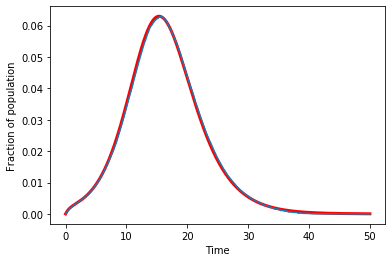

In [127]:
total_iter = 100

T_max = 50
t_av = np.linspace(0.00000001,T_max,10*T_max)
S_av = np.zeros(len(t_av),float)
E_av = np.zeros(len(t_av),float)
I_av = np.zeros(len(t_av),float)
R_av = np.zeros(len(t_av),float)
#print(t_av)
N_tot = 10000
exp_0 = 100

len_t = []

for i in range(0,total_iter):
    t,S,E,I,R = GA(exp_0,N_tot)
    len_t.append(len(t))
    k=0
    j_max = 0
    s_at_k = 0
    e_at_k = 0
    inf_at_k = 0
    r_at_k = 0
    while(k<len(t_av)):
        counter = 0
        s_at_k = 0
        e_at_k = 0
        inf_at_k = 0
        r_at_k = 0
        for j in range(j_max,len(t)):
            if(t[j]<t_av[k]):
                inf_at_k = inf_at_k+I[j]
                s_at_k = s_at_k + S[j]
                r_at_k = r_at_k + R[j]
                e_at_k = e_at_k + E[j]
                counter += 1
            else:
                j_max = j+1
                if(counter !=0):
                    I_av[k] = I_av[k]+inf_at_k/counter
                    S_av[k] = S_av[k]+s_at_k/counter
                    E_av[k] = E_av[k]+e_at_k/counter
                    R_av[k] = R_av[k]+r_at_k/counter
                break
        k=k+1
    
    
t_ex, S_ex, E_ex, I_ex, R_ex = SEIR(exp_0,N_tot)

plt.plot(t_ex,I_ex, linewidth=3, color='red')
plt.plot(t_av,I_av/total_iter)

plt.xlabel('Time')
plt.ylabel('Fraction of population')
#plt.savefig('../images/Gillespie_100avg_i0_100_3.png')
plt.show()

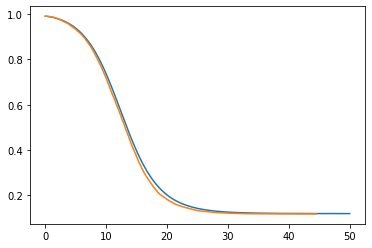

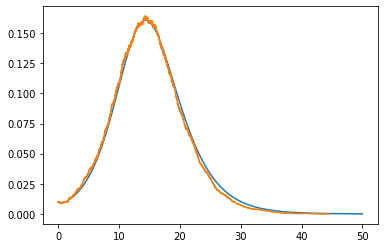

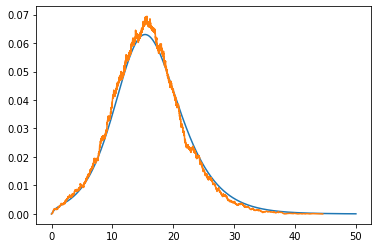

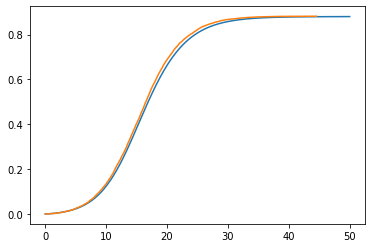

In [128]:
plt.plot(t_ex,S_ex)
plt.plot(t,S)
plt.show()

plt.plot(t_ex,E_ex)
plt.plot(t,E)
plt.show()

plt.plot(t_ex,I_ex)
plt.plot(t,I)
plt.show()

plt.plot(t_ex,R_ex)
plt.plot(t,R)
plt.show()